<a href="https://colab.research.google.com/github/Ayushman0Singh/CardiovascularDiseaseRiskPrediction/blob/main/CardiovascularRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
import matplotlib
%matplotlib inline

In [53]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Supervised ML-Classification /Copy of data_cardiovascular_risk.csv' #loading the dataset/ filepath 
df = pd.read_csv(file_path) # saving data set as df

In [3]:
df.head(5) #first look at the columns 

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.shape # no of rows and columns 

(3390, 17)

# DATA SET

Getting a first look at the data set. We can say that the dataset provides the patient's information. It includes over 3,000 records and 15 attributes. Variables Each attribute is a potential risk factor which could contribut to Coronary Heart Disease(CHD) which is our dependent variable for this problem. The features given to us can be divided into multiple catagories such as demographic, behavioral and medical risk factors.

Lets have look at these attributes.


**Age**: Age of the Subject;(Continuous - converted to whole numbers)

**Sex**: male or female(Nominal)

**Education**: Education of the subject

**is_Smoking**: whether or not the patient is a smoker (Nominal)

**Cigs_Per_Day**: the number of cigarettes the person smoked on average in one day.(continuous)

**BPMeds**: whether or not the patient was on blood pressure medication (Nominal)

**PrevalentStroke**: whether or not the patient had previously had a stroke (Nominal)

**PrevalentHyp**: whether or not the patient was hypertensive (Nominal)

**Diabetes**: whether or not the patient had diabetes (Nominal)

**TotChol**: total cholesterol level (Continuous)

**SysBP**: systolic blood pressure (Continuous)

**DiaBP**: diastolic blood pressure (Continuous)

**BMI**: Body Mass Index (Continuous)

**Heart Rate**: heart rate (Continuous)

**Glucose**: glucose level (Continuous)

**Ten_Year_CHD (Target Variable)**: rist of getting a coronary heart disease in 10 years (Nominal(yes or no))

These is my interpretation of the columns given to us in the data set. There demographic features such as age/sex. There are behavioral features related to smoking. We also have many health related medical information on the subjects.


# Exploratory Data Analysis

**Null values in the data set**

In [35]:
#null values in the data set
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

The nnumber of null values is low compared to the whole data set. glucose seems to have the highest number of null values. 304 rows are null out of 3390 rows. The total nuber of null values is less than 10 percent for the hight null valued column. So, its safe to drop these rows.

In [54]:
# dropping null values
df = df.dropna(how ='any')

Education column doesnt contribute anything towards the target variable.

In [55]:
# droping the education and id column since it has no effect on Ten_year_CHD
df.drop(labels = ['education', 'id'], axis = 1, inplace = True)

In [7]:
df.shape

(2927, 15)

**Data Type Check**


Next, We will check if the data-types are correct for the the columns or we need to do some data cleaning before we move to distributions.

In [8]:
df.info() #chcking data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   sex              2927 non-null   object 
 2   is_smoking       2927 non-null   object 
 3   cigsPerDay       2927 non-null   float64
 4   BPMeds           2927 non-null   float64
 5   prevalentStroke  2927 non-null   int64  
 6   prevalentHyp     2927 non-null   int64  
 7   diabetes         2927 non-null   int64  
 8   totChol          2927 non-null   float64
 9   sysBP            2927 non-null   float64
 10  diaBP            2927 non-null   float64
 11  BMI              2927 non-null   float64
 12  heartRate        2927 non-null   float64
 13  glucose          2927 non-null   float64
 14  TenYearCHD       2927 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 365.9+ KB


All the data-types are in the correct format, no cleaning is required.

Lets have a look at the distribution of target variable. Since our data get might have class imbalance. 

In [38]:
#prevalance in the data set
df['TenYearCHD'].value_counts(normalize=True)

0    0.848309
1    0.151691
Name: TenYearCHD, dtype: float64

85 percent of the data has no Ten_year_CHD while 15 percent is positive

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


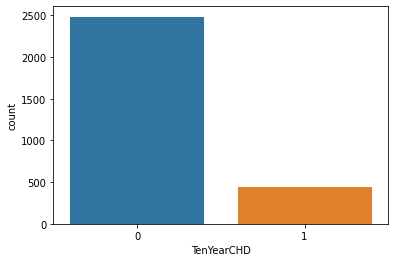

In [39]:
sns.countplot(df['TenYearCHD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


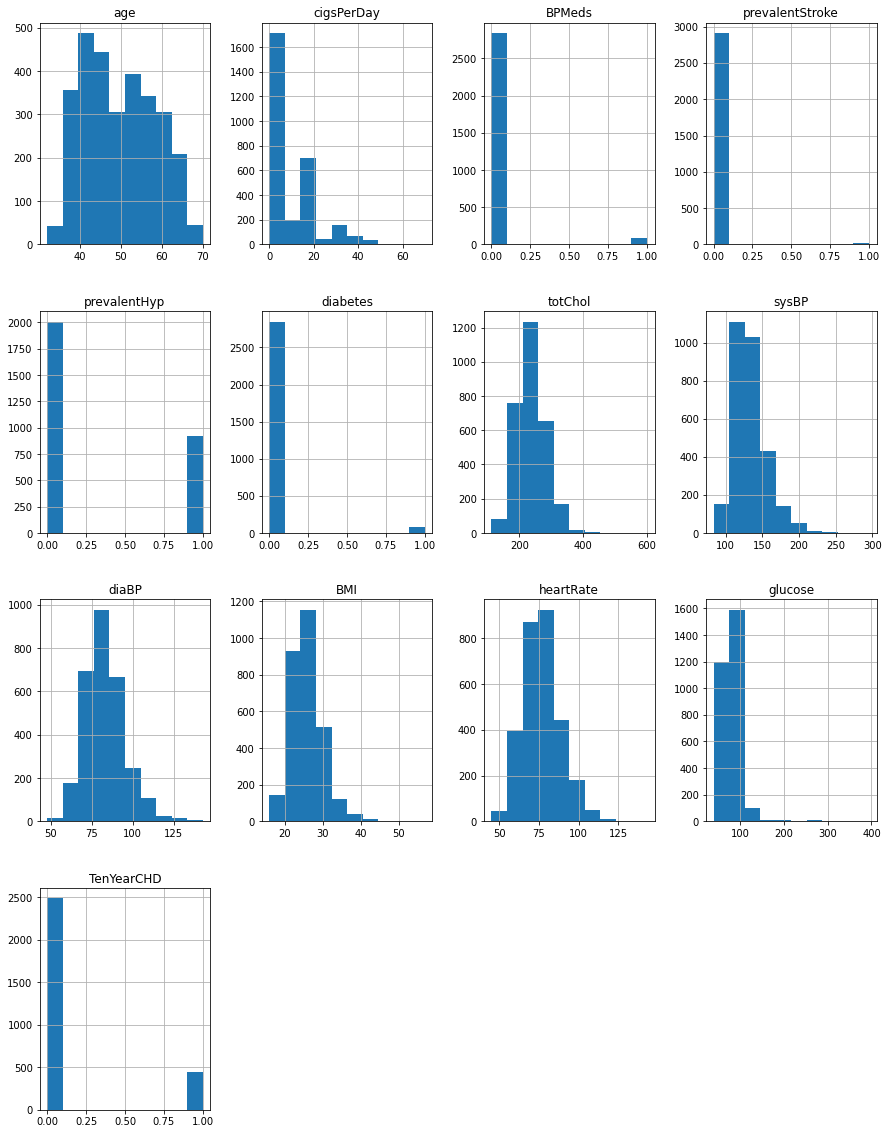

In [40]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

There are certain features with are highly imbalanced suck as prevalant stroke, BPmeds, diabetes. We have very few subjects with positives in these three criteria.

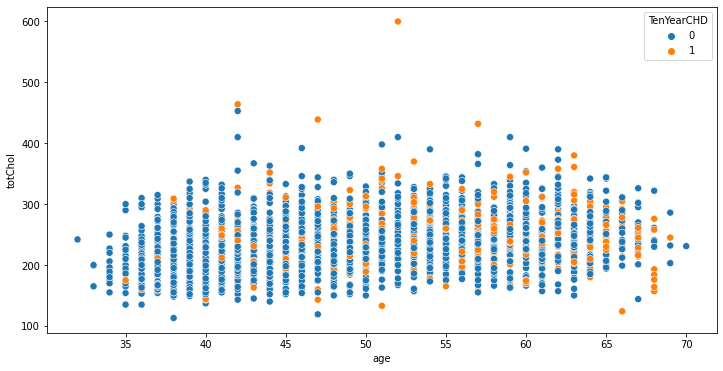

In [41]:
 # Scatter plot of age and totcholestrol with TenYearCHD
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['age'],y=df['totChol'],hue=df['TenYearCHD'],s=50)

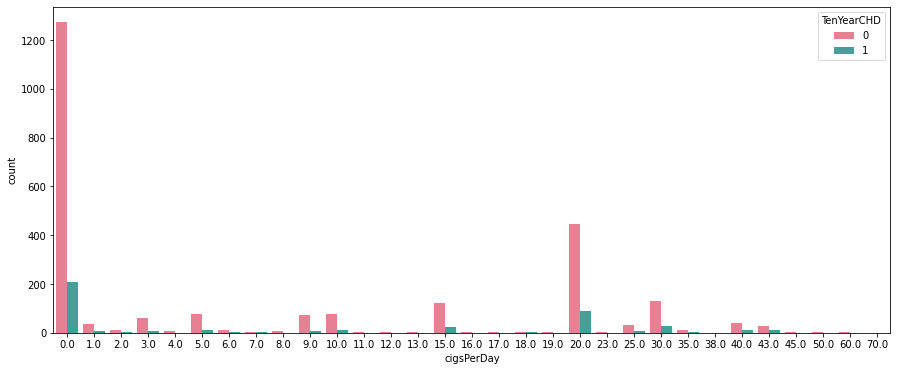

In [15]:
#checking variation of TenyearCHD with age
plt.figure(figsize=(15,6))
sns.countplot(x='cigsPerDay',data = df, hue = 'TenYearCHD',palette='husl')
plt.show()

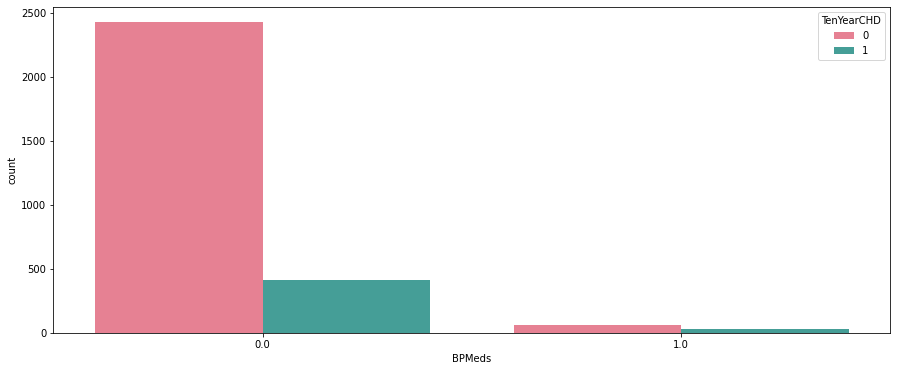

In [17]:
#variation of dependant variable with BPMeds
plt.figure(figsize=(15,6))
sns.countplot(x='BPMeds',data = df, hue = 'TenYearCHD',palette='husl')
plt.show()

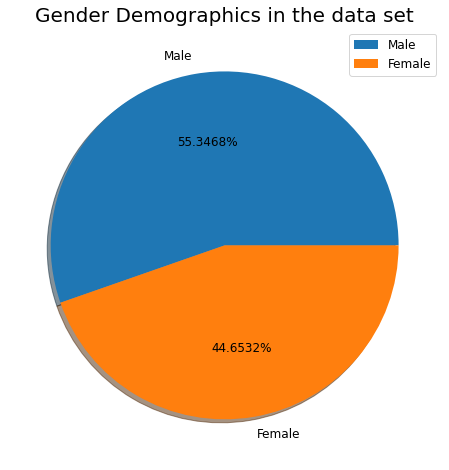

In [16]:
#checking Male-female split in the data
counts = list(df['sex'].value_counts()) #counting each catagory 
labels = 'Male', 'Female' #labels 
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, shadow=True, autopct="%.4f%%")
plt.title('Gender Demographics in the data set', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

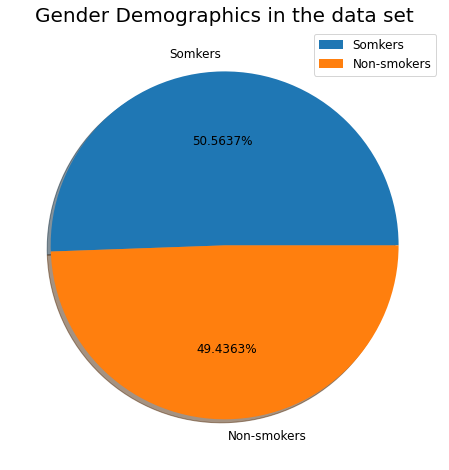

In [70]:
#checking Male-female split in the data
counts = list(df['is_smoking'].value_counts()) #counting each catagory 
labels = 'Somkers', 'Non-smokers' #labels 
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, shadow=True, autopct="%.4f%%")
plt.title('Gender Demographics in the data set', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

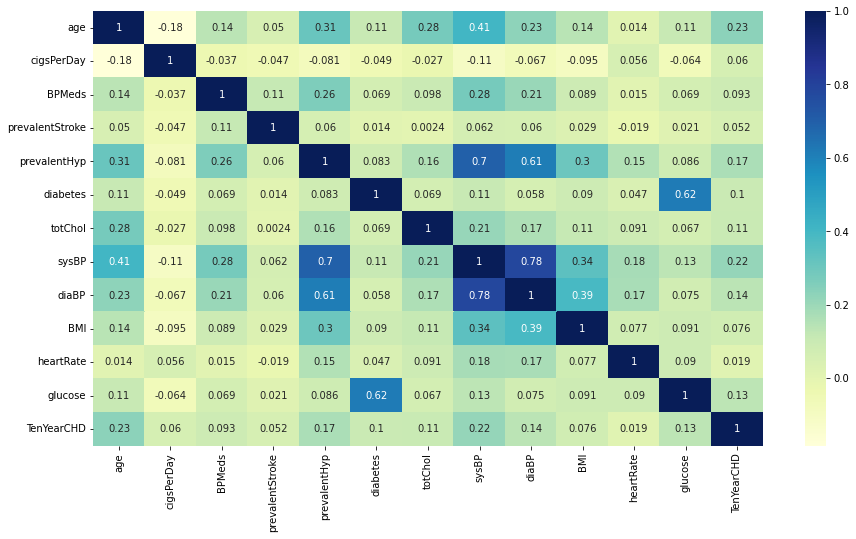

In [42]:
#checking correlation for all the features given to us
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

There are no features with more than 0.3 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors.

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Blood glucose and diabetes (obviously); systolic and diastolic blood pressures; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best fetaures. 

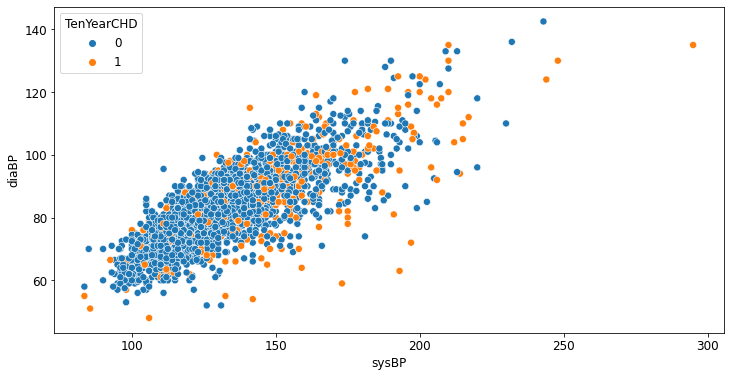

In [18]:
 # Scatter plot of sysBP and DyBP with TenYearCHD
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['sysBP'], y=df['diaBP'], hue=df['TenYearCHD'],s=50)

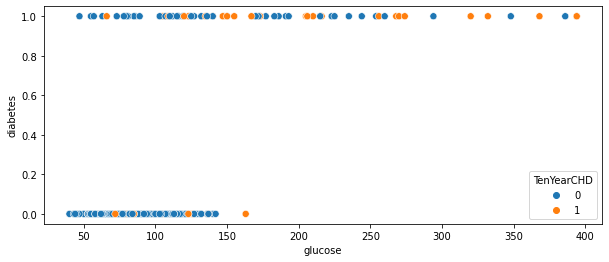

In [30]:
 # Scatter plot of sysBP and DyBP with TenYearCHD
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df['glucose'], y=df['diabetes'], hue=df['TenYearCHD'],s=50)

# Feature Selection

Prevalant stroke is highly correlated with sysBP and DyBP. We will drop prevalent stroke sicnce it carries similar information to the other two.

Diabetes and blood glucose are also correlated. We will drop diabetes. 

Systolic and diastolic Blood pressures are also correlated. 

Lets calculate **feature importance** using **DT and RF algorithms** to further decide which variables to use 

In [43]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Separating the features from the dependant variable.**

In [56]:
#selecting features froms the data
features = list(df.columns)[:-1]
X = df[features]
y = df['TenYearCHD']
#determining the numeric/catagorical feature
cat_col = ['sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes']
all_columns = list(X.columns)
numeric_col = [i for i in all_columns if i not in cat_col]

In [57]:
# Using standard Scalar on the numeric features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[numeric_col]= sc.fit_transform(X[numeric_col])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [58]:
X = pd.get_dummies(X,columns=['sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes'])
X.sample(3)

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
362,1.686031,-0.767017,-0.176059,-1.168667,-1.730389,-1.731104,0.075783,-0.491954,-0.578123,0,1,1,0,1,0,1,0,1,0
2868,0.406325,-0.767017,-0.176059,-0.114989,0.643909,-0.944473,-0.084036,0.761266,-0.329190,1,0,1,0,1,0,0,1,1,0
1036,-1.455066,-0.767017,-0.176059,-0.204663,-0.879226,0.007765,-0.239012,-1.494531,-0.370679,0,1,1,0,1,0,1,0,1,0


We will perform the test train spilt, We will stratify y since its an imbalanced data set and we want equal propotions of dependant variable in test and train sets.

In [59]:
 #test-train split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.15, stratify= y , random_state = 42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2487, 19)
(440, 19)
(2487,)
(440,)


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Decision Trees

In [50]:
#Decision tree Classifier Hyperparameter tunning
DT= DecisionTreeClassifier()
DT_param = {'max_depth':np.arange(10,40,2), 'max_leaf_nodes':np.arange(50,150,10)}
DT = GridSearchCV(DT, param_grid= DT_param, scoring ='f1' , cv = 5)
DT.fit(X_train,y_train)
print(DT.best_params_)
DT = DT.best_estimator_

{'max_depth': 34, 'max_leaf_nodes': 140}


In [61]:
y_pred_test_DT = DT.predict(X_test)
y_pred_train_DT = DT.predict(X_train)
print('f1 score on test set:', f1_score(y_test,y_pred_test_DT))
print('f1 score on train set:',f1_score(y_train,y_pred_train_DT) )
print('Auc_score Test:', roc_auc_score(y_test,y_pred_test_DT))
print('Auc_score Train:', roc_auc_score(y_train,y_pred_train_DT))
# Recall is an important metric in this case
print('Recall Score:', recall_score(y_test,y_pred_test_DT,pos_label=1))
print('Overall acccuracy', balanced_accuracy_score(y_train,y_pred_train_DT))
# Since its binary classiffication, lets check the confusion matrix
print('\nConfusion matrix\n', confusion_matrix(y_test,y_pred_test_DT))
print('Confusion matrix train\n', confusion_matrix(y_train,y_pred_train_DT,labels=[1,0]))
print('Confusion matrix model\n', confusion_matrix(y_test,y_pred_test_DT,labels=[1,0]) + confusion_matrix(y_train,y_pred_train_DT,labels=[1,0]))

f1 score on test set: 0.1386138613861386
f1 score on train set: 0.7463651050080775
Auc_score Test: 0.5160457764795326
Auc_score Train: 0.803759412674268
Recall Score: 0.1044776119402985
Overall acccuracy 0.803759412674268

Confusion matrix
 [[346  27]
 [ 60   7]]
Confusion matrix train
 [[ 231  146]
 [  11 2099]]
Confusion matrix model
 [[ 238  206]
 [  38 2445]]


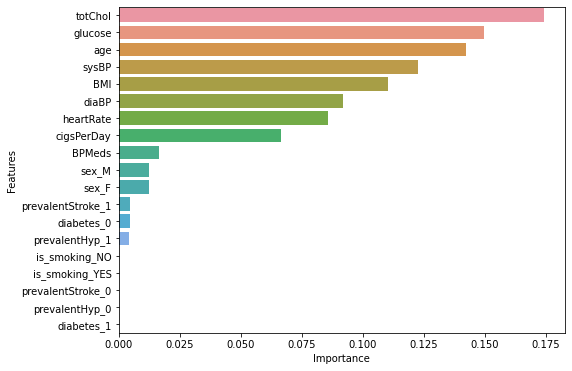

In [62]:
feature_imp=DT.feature_importances_
Columns = X_train.columns
featureImp_DT = pd.DataFrame(zip(Columns,feature_imp), columns = ('Features','Importance'))
featureImp_DT.sort_values(['Importance'], axis=0, ascending=False, inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Features', data= featureImp_DT)

# Random forest

In [63]:
# RF hyper parameter tunnig
rf = RandomForestClassifier() # creating a RF object
rf_params = {'n_estimators':[150,200,250], 'max_depth': np.arange(2,15)} # parameters to hyper-parameter tune over
rf = GridSearchCV(rf , param_grid=rf_params,scoring = 'f1', cv=5)
rf.fit(X_train,y_train)
print(rf.best_params_)
RF= rf.best_estimator_


{'max_depth': 14, 'n_estimators': 150}


In [64]:
y_pred_test_RF = RF.predict(X_test)
y_pred_train_RF = RF.predict(X_train)
print('f1 score on test set:', f1_score(y_test,y_pred_test_RF))
print('f1 score on train set:',f1_score(y_train,y_pred_train_RF) )
print('Auc_score Test:', roc_auc_score(y_test,y_pred_test_RF))
print('Auc_score Train:', roc_auc_score(y_train,y_pred_train_RF))
# Recall is an important metric in this case
print('Recall Score:', recall_score(y_test,y_pred_test_RF))
print('Overall acccuracy', balanced_accuracy_score(y_train,y_pred_train_RF))
# Since its binary classiffication, lets check the confusion matrix
print('\nConfusion matrix\n', confusion_matrix(y_test,y_pred_test_RF,labels=[1,0]))
print('Confusion matrix train\n', confusion_matrix(y_train,y_pred_train_RF,labels=[1,0]))
print('Confusion matrix model\n', confusion_matrix(y_test,y_pred_test_RF,labels=[1,0]) + confusion_matrix(y_train,y_pred_train_RF,labels=[1,0]))

f1 score on test set: 0.0821917808219178
f1 score on train set: 0.9072463768115943
Auc_score Test: 0.5183666119803129
Auc_score Train: 0.9151193633952255
Recall Score: 0.04477611940298507
Overall acccuracy 0.9151193633952255

Confusion matrix
 [[  3  64]
 [  3 370]]
Confusion matrix train
 [[ 313   64]
 [   0 2110]]
Confusion matrix model
 [[ 316  128]
 [   3 2480]]


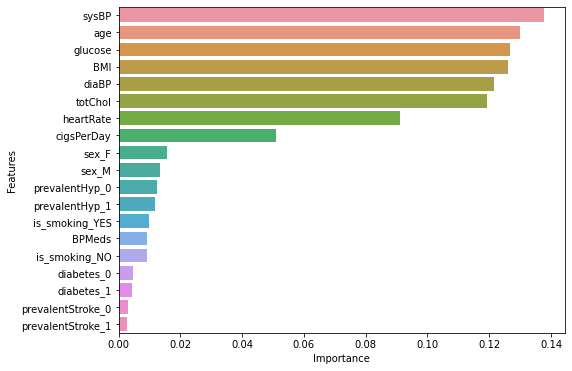

In [65]:
#plotting feature importance
feature_imp_RF = RF.feature_importances_
featureImp_RF = pd.DataFrame(zip(Columns,feature_imp_RF), columns = ('Features','Importance'))
featureImp_RF.sort_values(['Importance'], axis=0, ascending=False, inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Features', data= featureImp_RF)

According to the feature importances of DT and RF algorithms we can see that Prevalent stroke, diabetes, Smoking or not, BPMeds and sex have the least effect on your dependant variable. Lets drop these columns for our rest of the models.  

In [66]:
X.sample(5)

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
3181,-0.524371,-0.767017,-0.176059,0.467897,-0.834427,-0.240645,0.194437,0.343526,-0.578123,0,1,1,0,1,0,1,0,1,0
1698,-0.524371,0.916378,-0.176059,0.086780,-0.162456,-0.240645,0.317933,-0.909695,-0.702590,0,1,0,1,1,0,1,0,1,0
1445,0.057314,-0.767017,-0.176059,-0.114989,-0.565639,-0.654661,-0.464212,-1.327435,-0.329190,1,0,1,0,1,0,1,0,1,0
2431,-0.873382,-0.767017,-0.176059,-1.213504,-0.565639,-0.571858,-1.132546,2.014487,-0.412168,1,0,1,0,1,0,1,0,1,0
972,-0.291697,2.599773,-0.176059,-0.361594,0.509515,0.670192,2.417374,0.761266,-0.661101,1,0,0,1,1,0,1,0,1,0


In [67]:
# droping highly correlated features and features with very less feature importance value. 
X.drop(labels=['sex_F','sex_M','is_smoking_NO','is_smoking_YES','prevalentStroke_0','prevalentStroke_1','prevalentHyp_0','prevalentHyp_1','diabetes_0','diabetes_1'], axis = 1, inplace=True ) 

In [68]:
X.sample(5)

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
1761,-0.059023,-0.767017,-0.176059,-0.384013,-0.834427,-0.075038,-0.270492,-0.575502,-0.910035
2599,-0.873382,1.337226,-0.176059,0.423060,-0.498442,-0.737464,-0.534435,-0.491954,1.371856
3194,1.104346,0.916378,-0.176059,0.647247,1.450275,1.332619,0.792547,1.680295,0.002722
3244,-0.408034,0.916378,-0.176059,-1.235923,-0.700033,-0.406251,-0.883131,-0.324858,-0.951523
2019,0.289988,-0.767017,-0.176059,1.409482,0.195928,-0.323448,-0.096144,0.844814,-0.370679


# TOP FEATURES


Top features according to DT and RF algorithms 
1. Age
2. Total cholesterol
3. Systolic blood pressure
4. Diastolic blood pressure
5. BMI
6. Heart rate
7. Blood glucose
8. Number of cigs smoked per day

In [75]:
# updated data frame
new_df = pd.concat([X, y], axis=1)
new_df.sample(5)

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2493,-0.291697,1.758075,-0.176059,-2.110251,-0.834427,-0.323448,0.192015,-0.575502,-0.412168,1
406,-1.106055,-0.767017,-0.176059,-0.406431,-1.461601,-1.896711,-1.457027,-0.324858,-0.910035,0
3355,-0.408034,-0.767017,-0.176059,0.378222,0.151130,0.338979,1.318013,1.011910,-0.080256,0
1774,-0.408034,4.283167,-0.176059,1.073201,-0.520841,-0.075038,0.441430,-0.491954,-0.121745,0
1443,1.569694,2.599773,-0.176059,-1.303179,-0.744831,-1.151481,-0.883131,1.596747,-0.287701,1


# Models and predictions

Since the dataset is imbalanced. We may end up with a classifier that mostly predicts negative classes thus have a high accuracy but poor specificity or sensitivity. like we saw in our RF and DT models we used before. To adress this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE).

**SMOTE**

> SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.


For our case, since we have many negative cases in TenYearCHD we will first undersample the negative cases a bit and then over-sample the minority class(possitive TenYearCHD) to blance the data set a bit.

In [77]:
from imblearn.over_sampling import SMOTE                     # library for OVER-SAMPLING minority class
from imblearn.under_sampling import RandomUnderSampler       # UnderSampling Majority class
from imblearn.pipeline import Pipeline                       # pipeline to apply undersampling and over sampling

In [83]:
# the numbers before smote
num_before = dict(y.value_counts())

#perform smoting
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps) # define pipeline

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)

#the numbers after smote
num_after =dict(y_smote.value_counts())

{0: 2483, 1: 444} {0: 2482, 1: 1986}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


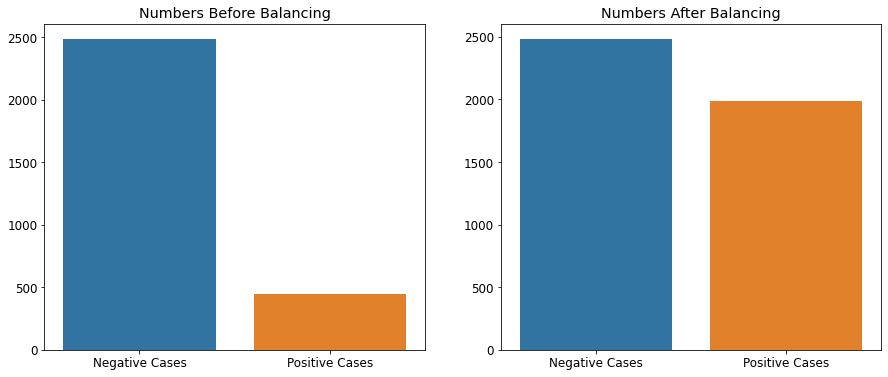

In [85]:
# checking data set after oversampling 
print(num_before , num_after)
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [89]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.sample(5)

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1830,1.686031,2.599773,-0.176059,-0.697874,-0.296850,-0.075038,-0.350401,1.596747,0.625055,0
2842,0.057314,-0.767017,-0.176059,-1.078992,0.509515,0.421782,3.216470,-1.327435,0.210166,1
2388,-0.408034,0.916378,-0.176059,-1.101411,-1.595995,-1.482694,-1.120439,-0.659050,-0.910035,0
1144,0.871673,-0.682848,-0.176059,0.378222,1.853458,0.131970,-0.381881,1.179006,-0.246212,0
1550,-1.222392,0.916378,-0.176059,-1.975739,-0.476043,-0.903071,-1.088959,0.761266,-0.287701,0


In [108]:
#new X,y after feature selection and SMOTING
X_new = new_data[['age','cigsPerDay',	'BPMeds',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']]
y_new= new_data[['TenYearCHD']]

In [109]:
#test train split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2, stratify=y_new ,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3574, 9), (3574, 1), (894, 9), (894, 1))

**LOGISTIC REGRESSION**

In [138]:
# importing more models for prediction 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
# removing Dataconversion warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [139]:
#search for optimun parameters using gridsearch, regularisation is applied by default in sklearn's logistic regression, lets have a look at the range of hyperparameters.
params = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100],'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)
#train the classifier
logistic_clf.fit(X_train,y_train)
#predictions using the best hyper-params of the model
logistic_predict = logistic_clf.predict(X_test)
#accuracy of predictions
log_accuracy = balanced_accuracy_score(y_test,logistic_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [140]:
# best parameters and acccuracy 
print(logistic_clf.best_params_)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Using logistic regression we get an accuracy of 68.34%
The f1 score for logistic regression is 65.95%


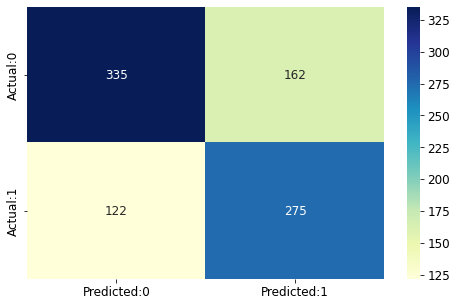

In [120]:
#drawing a heat map of confusion matrix
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

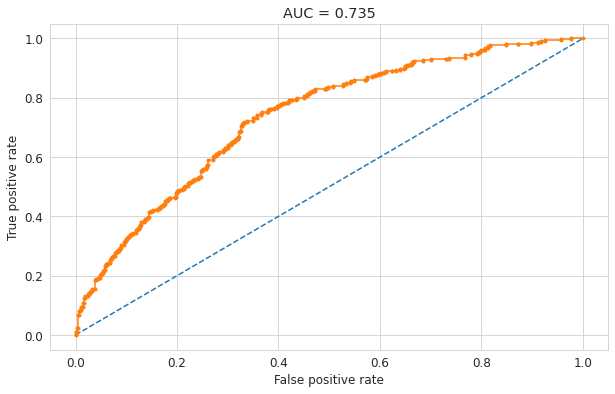

In [124]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

**K-Nearest Neighbors**

In [128]:
from sklearn.neighbors import KNeighborsClassifier
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)
# train the model
knn_clf.fit(X_train,y_train)
# predictions
knn_predict = knn_clf.predict(X_test)
#accuracy
knn_accuracy = balanced_accuracy_score(y_test,knn_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [129]:
# best parameters and acccuracy 
print(knn_clf.best_params_)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

{'n_neighbors': 1}
Using k-nearest neighbours we get an accuracy of 88.03%
The f1 score for K nearest neignbours is 86.93%


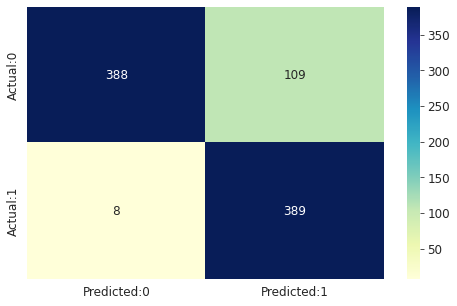

In [131]:
#drawing a heat map of confusion matrix
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

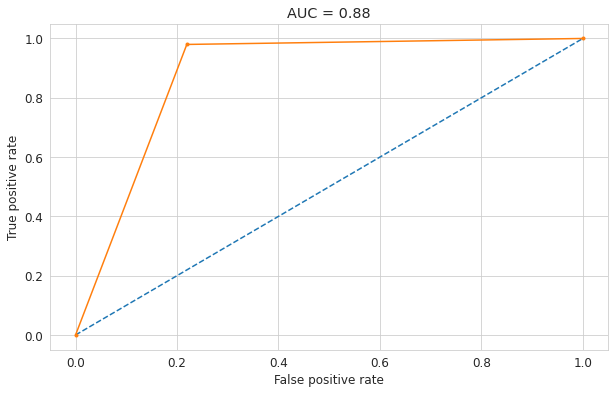

In [132]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

**Support Vector Machines**

In [134]:
# removing Dataconversion warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.svm import SVC
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)
# train the model
svm_clf.fit(X_train,y_train)
# predictions
svm_predict = svm_clf.predict(X_test)
#accuracy
svm_accuracy = balanced_accuracy_score(y_test,svm_predict)

In [135]:
# best parameters and acccuracy 
print(svm_clf.best_params_ )
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

{'C': 10, 'gamma': 1}
Using SVM we get an accuracy of 91.85%
The f1 score for SVM is 90.84%


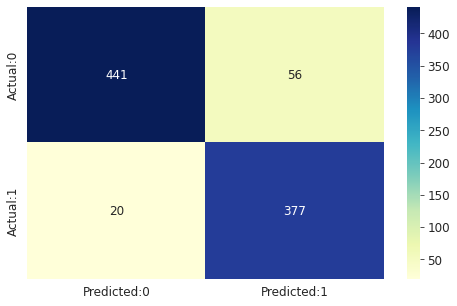

In [136]:
#drawing a heat map of confusion matrix
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

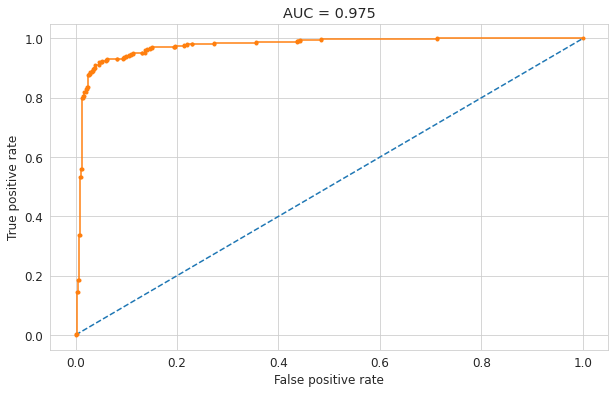

In [137]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

**XGBOOST**